<a href="https://colab.research.google.com/github/dainaklis/PySpark/blob/main/testas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTUOJAME**

In [163]:
!pip install pyspark

In [ ]:
# !python -m pip uninstall matplotlib
# !pip install matplotlib==3.4.3!

In [1]:
!pip install --upgrade matplotlib

In [2]:
from pyspark.sql import functions as F, Row, SparkSession
from pyspark.sql.functions import expr, col
from pyspark.sql.functions import *
from pyspark.sql import  SQLContext
from pyspark.sql import types 
from pyspark.sql.types import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import pyspark.sql.functions as func

# **PRADŽIA**

In [3]:
spark = SparkSession.builder.master("local").getOrCreate()

In [4]:
mylist=[
    {"city": "Alytus"},
    {"city": "Kaunas"},
    {"city": "Klaipėda"},
    ]

In [5]:
df = spark.createDataFrame(Row(**x) for x in mylist)

In [6]:
df.show(truncate=False)

+--------+
|city    |
+--------+
|Alytus  |
|Kaunas  |
|Klaipėda|
+--------+



# **BANDYMAI**

In [8]:
spark2 = SparkSession.builder.appName("MyFirstApp").getOrCreate()

In [9]:
st = spark2.read.csv("Stud.csv", header="true", inferSchema=True)
## interShema - PAKEICIA TYPE

In [10]:
st.show(truncate=False, n=10)
# darb.show(truncate=False)

+---------------------------------------------------------+------------------------------------+------------------------------------+-----------------------------------------+---------------------+-----+----+------+---------+---------+-----+---------+---------+---------------+--------------+--------------+
|_type                                                    |_id                                 |_revision                           |ins_pav                                  |prg_pavad_lt         |n_all|n_lt|n_vac |n_vac_imm|n_any_imm|p_vac|p_vac_imm|p_any_imm|confidentiality|data_freshness|reference_data|
+---------------------------------------------------------+------------------------------------+------------------------------------+-----------------------------------------+---------------------+-----+----+------+---------+---------+-----+---------+---------+---------------+--------------+--------------+
|datasets/gov/lsd/covid19/StudVakcPagalIstaigasIrProgramas|d0a62c29-1418-411

In [11]:
st.printSchema()

root
 |-- _type: string (nullable = true)
 |-- _id: string (nullable = true)
 |-- _revision: string (nullable = true)
 |-- ins_pav: string (nullable = true)
 |-- prg_pavad_lt: string (nullable = true)
 |-- n_all: string (nullable = true)
 |-- n_lt: integer (nullable = true)
 |-- n_vac: double (nullable = true)
 |-- n_vac_imm: double (nullable = true)
 |-- n_any_imm: double (nullable = true)
 |-- p_vac: double (nullable = true)
 |-- p_vac_imm: double (nullable = true)
 |-- p_any_imm: double (nullable = true)
 |-- confidentiality: string (nullable = true)
 |-- data_freshness: string (nullable = true)
 |-- reference_data: string (nullable = true)



In [12]:
need = st.select("ins_pav","prg_pavad_lt","p_vac","n_all")
need.printSchema()

# PAKEICIAM TYPES
need_new = need.withColumn("n_all", need["n_all"].cast(IntegerType()))
need_new2 = need_new.withColumn("p_vac", need_new["p_vac"].cast(DoubleType()))
need_new2.printSchema()

# need_new2.show(n=940, truncate=False)

need_new2.sort(desc("n_all")).show(truncate=False) 
need_new2.sort(desc("p_vac")).show(truncate=False) 


root
 |-- ins_pav: string (nullable = true)
 |-- prg_pavad_lt: string (nullable = true)
 |-- p_vac: double (nullable = true)
 |-- n_all: string (nullable = true)

root
 |-- ins_pav: string (nullable = true)
 |-- prg_pavad_lt: string (nullable = true)
 |-- p_vac: double (nullable = true)
 |-- n_all: integer (nullable = true)

+-----------------------------------------+-------------------------------------+-----+-----+
|ins_pav                                  |prg_pavad_lt                         |p_vac|n_all|
+-----------------------------------------+-------------------------------------+-----+-----+
|Lietuvos sveikatos mokslų universitetas  |Medicina                             |95.6 |2292 |
|Vilniaus universitetas                   |Medicina                             |96.2 |1428 |
|Vilniaus universitetas                   |Teisė                                |88.9 |1120 |
|Kauno technologijos universitetas        |Programų sistemos                    |91.6 |820  |
|Lietuvos sveik

In [13]:
allVgtu = need_new2.filter(need_new2.ins_pav  == "Vilniaus Gedimino technikos universitetas")
allVgtu.printSchema()
# allVgtu.show(n=73,truncate=False)

# allVgtu.sort(desc("n_all")).show(truncate=False) 
# allVgtu.sort(desc("p_vac")).show(truncate=False) 

root
 |-- ins_pav: string (nullable = true)
 |-- prg_pavad_lt: string (nullable = true)
 |-- p_vac: double (nullable = true)
 |-- n_all: integer (nullable = true)



In [14]:
allImm = allVgtu.orderBy('p_vac', ascending=False)
# allImm.show(truncate=False)
allImm.printSchema()

allVgtu.orderBy('n_all', ascending=False).show(truncate=False)
allVgtu.orderBy('p_vac', ascending=False).show(truncate=False)
# allVgtu.sort(asc("n_all")).show(truncate=False) 

root
 |-- ins_pav: string (nullable = true)
 |-- prg_pavad_lt: string (nullable = true)
 |-- p_vac: double (nullable = true)
 |-- n_all: integer (nullable = true)

+-----------------------------------------+--------------------------------------------+-----+-----+
|ins_pav                                  |prg_pavad_lt                                |p_vac|n_all|
+-----------------------------------------+--------------------------------------------+-----+-----+
|Vilniaus Gedimino technikos universitetas|Kūrybinės industrijos                       |88.4 |466  |
|Vilniaus Gedimino technikos universitetas|Programų inžinerija                         |87.0 |411  |
|Vilniaus Gedimino technikos universitetas|Multimedija ir kompiuterinis dizainas       |91.8 |392  |
|Vilniaus Gedimino technikos universitetas|Statybos inžinerija                         |83.4 |358  |
|Vilniaus Gedimino technikos universitetas|Transporto inžinerija                       |83.8 |292  |
|Vilniaus Gedimino technikos

In [15]:
# PARODO TYPES ARBA DATAFRAME
# need_new2.select("ins_pav","prg_pavad_lt","p_vac","n_all") 

# PARODO INFO
# need_new2.describe().select("ins_pav").show(truncate=False)
# need_new2.describe().show(truncate=False)

# st.describe().show(truncate=False)

# need_new2.describe().show(truncate=False)
# need_new2.describe(['n_all']).show()

# SUMMARY
# need_new2.summary().show()
# need_new2.summary("count", "min", "25%", "75%", "max").show()
# need_new2.select("ins_pav", "p_vac").summary("count", "mean").show()

# Pakeicia TUSCIUS laukus
# st.na.fill("Nera").show()

# Ismeta TUSCIU laukus   
# st.na.drop(how="any").show() 
# allImm.na.drop(how="any").show(truncate=False)

# PAIESKA
# need_new2.filter("p_vac >= 90").show(truncate=False)
# need_new2.filter("p_vac <= 60").show(truncate=False)
# need_new2.filter("p_vac >= 98").show(truncate=False)

# need_new2.filter("p_vac >= 90").select("ins_pav","prg_pavad_lt","p_vac", ).show(truncate=False)
# need_new2.filter(need_new2["ins_pav"] == 'Vilniaus universitetas').show(truncate=False)
# need_new2.filter((need_new2["prg_pavad_lt"] == 'Informatika') & (need_new2["n_all"] >=60)).show(truncate=False)


# VU ir VGTU TOP-10 VAKCINACIJA %
# vuVgtu = need_new2.filter((need_new2["ins_pav"] == 'Vilniaus universitetas') | \
#                  (need_new2["ins_pav"] == 'Vilniaus Gedimino technikos universitetas'))

# visiUniverai = need_new2.filter("p_vac <= 100").select("ins_pav","prg_pavad_lt", "p_vac","n_all")
                 
# vuVgtu.sort(desc("p_vac")).limit(10).show(n=940, truncate=False)
# visiUniverai.sort(desc("p_vac")).limit(10).show(n=940, truncate=False) 

# need_new2.filter((need_new2["ins_pav"] == 'Vilniaus universitetas') & (need_new2["p_vac"] >=95)).show(truncate=False)

# SUMA PAGAL UNIVERSITA
# sumaAlStud = visiUniverai.groupBy("ins_pav").sum()
# sumaAlStud.sort(desc("sum(n_all)")).limit(10).show(truncate=False)

# avgAllVak = visiUniverai.groupBy("ins_pav").avg()
# avgAllVak.sort(desc("avg(p_vac)")).limit(10).show(truncate=False)


# AVEGARE PAGAL UNIVERA
# need_new2.groupBy("ins_pav").mean().show(truncate=False)

# ROW KIEKIS PAGAL UNIVERA (PARODO KIEKVIENO UNI TURIMU FAKULTETU SKAICIU)
# visiUniverai.groupBy("ins_pav").count().sort('count', ascending=False).limit(10).show(truncate=False)

# PARODO MAX IR MIN PAGAL KAZKA
# need_new2.groupBy("prg_pavad_lt").min().show(truncate=False)
# need_new2.groupBy("prg_pavad_lt").max().show(truncate=False)
# allVgtu.groupBy("prg_pavad_lt").max().show(truncate=False)

# REIKIA SORT PADARYTI
# need_new2.groupBy("ins_pav").max().show(truncate=False)


# viso STUDENTU SUMA
# st.agg({'n_all':'sum'}).show(truncate=False) 
# need_new2.agg({'n_all':'sum'}).show(truncate=False)
# allVgtu.agg({'n_all':'sum'}).show(truncate=False)  

# MAX STUDENTU IR VAKCINUOTU %
# allVgtu.agg({'p_vac':'avg'}).show(truncate=False)
# allVgtu.agg({'n_all':'max'}).show(truncate=False) 
# need_new2.agg({'p_vac':'avg'}).show(truncate=False)   

# SORT NUO MAZIAUSIO
# allVgtu.sort(asc("n_all")).show(n=500, truncate=False)
# need_new2.sortWithinPartitions("n_all", ascending=True).show(n=30, truncate=False)

# RUSIUOJA PAGAL DU KRITERIJUS
# need_new2.orderBy(["ins_pav", "n_all"], ascending=[0, 1]).show(n=40, truncate=False)

# AVERAGE
# (sorted(need_new2.groupBy('ins_pav').agg({'p_vac': 'mean'}).collect()))




In [16]:
# PARODO EILUTES ROW
# need_new2.head(5)

# PARODO COLUMS NAME
# need_new2.columns

# allVgtu.where("n_all <= 100").show(truncate=False)
# allVgtu.filter("n_all >= 150").show(truncate=False)

# ISMETU VISAS NULL REIKSMES
# need_new2.show(truncate=False, n=30)
# need_new2.na.drop('any').show(n=30, truncate=False)

# allVgtu.show(n=20, truncate=False)
# allVgtu.na.fill('Orlaivių pilotavimas').show(n=20, truncate=False)
# allVgtu.na.fill({'ins_pav': 'Vilniaus Gedimino technikos universitetas', 'prg_pavad_lt': 'Bioinžinerija'}).show(n=20, truncate=False)

# //PAKEICIU REIKSMES
# need_new2.show(truncate=False, n=15)
# need_new2.na.replace({'Istorija': 'NERA'}).show(truncate=False, n=15)
# need_new2.na.replace(['Istorija','Socialinis darbas'],[":)",":)"],'prg_pavad_lt').show(truncate=False, n=15)

# PARODO KIEK YRA ROW
# allVgtu.groupBy("prg_pavad_lt").count().sort("count").show(truncate=False, n=940)
# need_new2.groupBy("ins_pav").count().sort("count", ascending=False).show(n=940, truncate=False)

In [17]:
# allVgtu.printSchema()
# need_new2.printSchema()

# allVgtu.select("prg_pavad_lt").show(truncate=False, n=940)

# allVgtu.sort(desc("n_all")).show(n=10, truncate=False)
# allVgtu.sort(asc("n_all")).show(n=10, truncate=False)

# allVgtu.sort(desc("p_vac")).show(n=10, truncate=False)
# allVgtu.sort(asc("p_vac")).show(n=10, truncate=False)

# AVERAGE
# (sorted(need_new2.groupBy('ins_pav').agg({'p_vac': 'mean'}).collect()))

# need.head(50)

# blogi = need_new2.filter(need_new2.ins_pav == "any")
# blogi = need_new2.sort("ins_pav")
# blogi.show(n=30, truncate=False)



In [18]:
# APVALINAME
# testukas = allVgtu.groupBy("ins_pav").avg()
# testukas.show()
# df3 = testukas.withColumn("avg(p_vac)", func.round(testukas["avg(p_vac)"],1))
# df3.show()

# **ANALIZUOJAME, BRAIŽOME**

In [24]:
# VU ir VGTU TOP-10 VAKCINACIJA %
vuVgtu = need_new2.filter((need_new2["ins_pav"] == 'Vilniaus universitetas') | \
                 (need_new2["ins_pav"] == 'Vilniaus Gedimino technikos universitetas'))

visiUniverai = need_new2.filter("p_vac <= 100").select("ins_pav","prg_pavad_lt", "p_vac","n_all")
                 
vuVgtu.sort(desc("p_vac")).limit(10).show(truncate=False)
visiUniverai.sort(desc("p_vac")).limit(10).show(truncate=False) 

# SUMA PAGAL UNIVERSITA
sumaAlStud = visiUniverai.groupBy("ins_pav").sum()
sumaAlStud.sort(desc("sum(n_all)")).limit(10).show(truncate=False)

avgAllVak = visiUniverai.groupBy("ins_pav").avg()
avgAllVak.sort(desc("avg(p_vac)")).limit(10).show(truncate=False)

+-----------------------------------------+----------------------------------+-----+-----+
|ins_pav                                  |prg_pavad_lt                      |p_vac|n_all|
+-----------------------------------------+----------------------------------+-----+-----+
|Vilniaus universitetas                   |Medicina                          |96.2 |1428 |
|Vilniaus universitetas                   |Biochemija                        |96.1 |179  |
|Vilniaus universitetas                   |Molekulinė biologija              |95.6 |181  |
|Vilniaus universitetas                   |Kultūros istorija ir antropologija|95.6 |113  |
|Vilniaus Gedimino technikos universitetas|Bioinžinerija                     |95.4 |117  |
|Vilniaus Gedimino technikos universitetas|Orlaivių pilotavimas              |95.2 |110  |
|Vilniaus universitetas                   |Odontologija                      |95.0 |179  |
|Vilniaus universitetas                   |Farmacija                         |94.7 |191  |

In [25]:
# Parinkta 10 vakcinuotu fakultetu is VGTU, daugiausiai
vgtu10 = allVgtu.sort("p_vac", ascending=False)

# Parinkta 10 fakultetu su daugiausiai studentu is VGTU
vgtu2 = allVgtu.sort("n_all", ascending=False)

# vgtu10.printSchema()
vgtu10.limit(10).show(truncate=False)
vgtu2.limit(10).show(truncate=False)

vgtu2.toPandas()


+-----------------------------------------+-------------------------------------+-----+-----+
|ins_pav                                  |prg_pavad_lt                         |p_vac|n_all|
+-----------------------------------------+-------------------------------------+-----+-----+
|Vilniaus Gedimino technikos universitetas|Bioinžinerija                        |95.4 |117  |
|Vilniaus Gedimino technikos universitetas|Orlaivių pilotavimas                 |95.2 |110  |
|Vilniaus Gedimino technikos universitetas|Multimedija ir kompiuterinis dizainas|91.8 |392  |
|Vilniaus Gedimino technikos universitetas|Renginių inžinerija                  |91.8 |61   |
|Vilniaus Gedimino technikos universitetas|Inžinerinė ekonomika ir vadyba       |91.7 |61   |
|Vilniaus Gedimino technikos universitetas|Verslo logistika                     |91.2 |57   |
|Vilniaus Gedimino technikos universitetas|Aviacijos mechanikos inžinerija      |91.0 |224  |
|Vilniaus Gedimino technikos universitetas|Informacinių sist

,ins_pav,prg_pavad_lt,p_vac,n_all
0,Vilniaus Gedimino technikos universitetas,Kūrybinės industrijos,88.4,466
1,Vilniaus Gedimino technikos universitetas,Programų inžinerija,87.0,411
2,Vilniaus Gedimino technikos universitetas,Multimedija ir kompiuterinis dizainas,91.8,392
3,Vilniaus Gedimino technikos universitetas,Statybos inžinerija,83.4,358
4,Vilniaus Gedimino technikos universitetas,Transporto inžinerija,83.8,292
...,...,...,...,...
67,Vilniaus Gedimino technikos universitetas,Taikomoji statistika,64.3,14
68,Vilniaus Gedimino technikos universitetas,Geodezija ir kartografija,58.3,12
69,Vilniaus Gedimino technikos universitetas,Telekomunikacijų inžinerija,58.3,12
70,Vilniaus Gedimino technikos universitetas,Dirbtinio intelekto sistemos,54.5,12


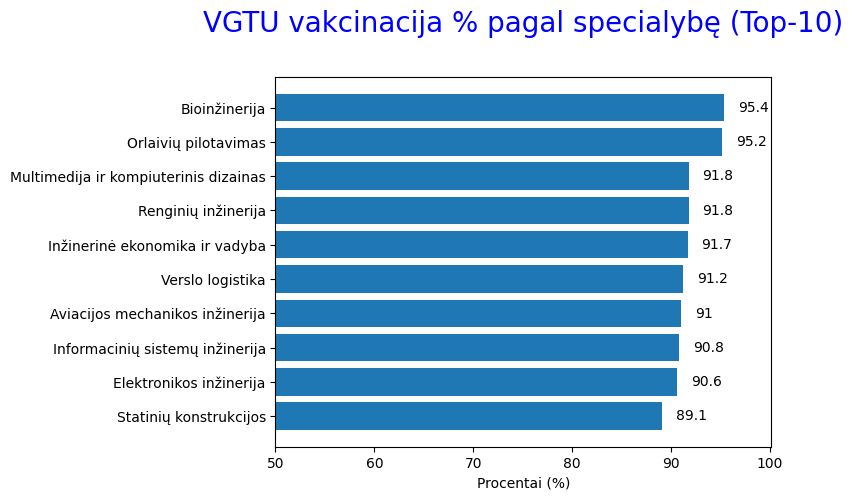

In [26]:
plt.rcdefaults()

fig, ax = plt.subplots()

# #Creating Table
vgtu10.limit(10).registerTempTable('VGTU_TOP_10')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from VGTU_TOP_10").toPandas()
df2 = sqlContext.sql("SELECT prg_pavad_lt, p_vac from VGTU_TOP_10").toPandas()

fakultetai = df2['prg_pavad_lt']
vakciProc = df2['p_vac']

# 1 DIAGRAMA
hbars = ax.barh(fakultetai, vakciProc, align='center')
ax.set_yticks(fakultetai)
ax.set_yticklabels(fakultetai)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Procentai (%)')
ax.set_title('VGTU vakcinacija % pagal specialybę (Top-10)', fontsize=20, y=1.1, color="blue")

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=10)
ax.set_xlim(left=50)

plt.show()

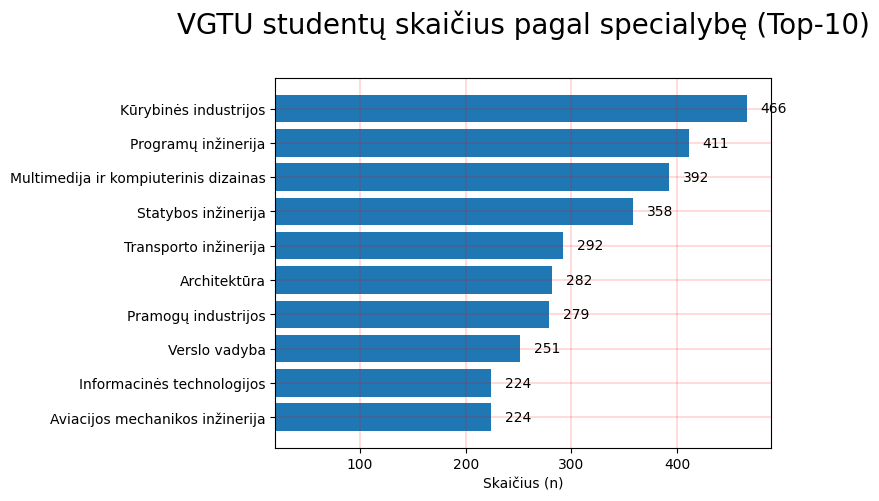

In [27]:
plt.rcdefaults()
fig, ax = plt.subplots()

# #Creating Table
vgtu2.limit(10).registerTempTable('VGTU_STUDENTAI')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from VGTU_STUDENTAI").toPandas()
df2 = sqlContext.sql("SELECT prg_pavad_lt, n_all from VGTU_STUDENTAI").toPandas()

fakultetai = df2['prg_pavad_lt']
studentai = df2['n_all']

# 2 DIAGRAMA
hbars2 = ax.barh(fakultetai, studentai, align='center')
ax.set_yticks(fakultetai)
ax.set_yticklabels(fakultetai)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Skaičius (n)')
ax.set_title('VGTU studentų skaičius pagal specialybę (Top-10)', fontsize=20, y=1.1)

ax.grid(color='r', linestyle='-', linewidth=0.2)

# Label with specially formatted floats
ax.bar_label(hbars2, fmt='%g', padding=10)
ax.set_xlim(left=20)

plt.show()

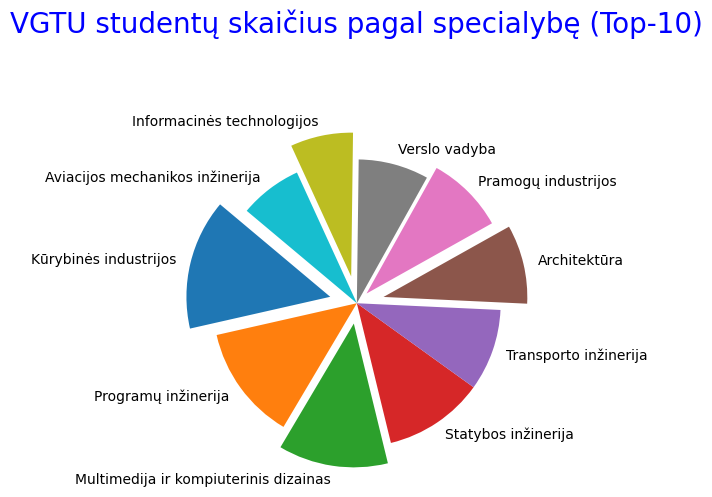

In [28]:
plt.rcdefaults()
fig, ax = plt.subplots()

# 3 PIE DIAGRAMA
#Creating Table
vgtu2.limit(10).registerTempTable('VGTU_TOP_10')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from VGTU_TOP_10").toPandas()
df2 = sqlContext.sql("SELECT prg_pavad_lt, p_vac, n_all from VGTU_TOP_10").toPandas()

explode = (0.2, 0, 0.15, 0, 0, 0.2, 0.1, 0, 0.2, 0)

#Creating Visualization
fig = plt.pie(df2['n_all'], explode= explode ,\
            labeldistance=1.1,radius=1.05, startangle=140,\
            labels=df1['prg_pavad_lt'])
plt.title('VGTU studentų skaičius pagal specialybę (Top-10)', y=1.2, fontsize=20, color="blue")

plt.axis('equal')
plt.show()

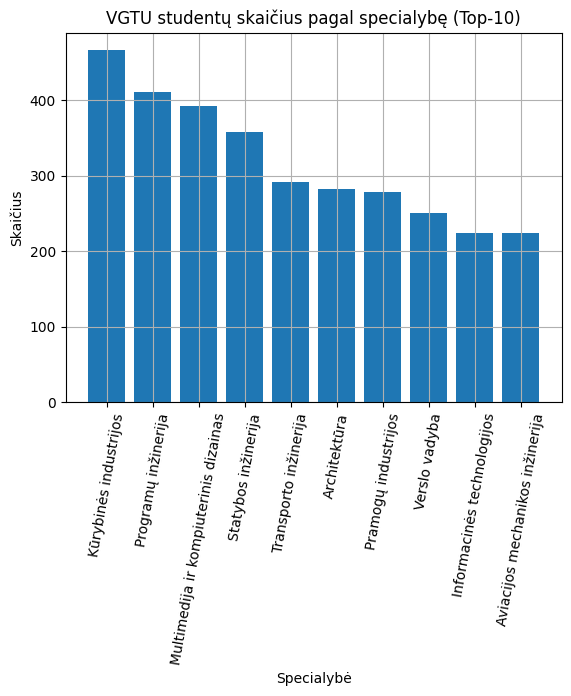

In [29]:
# 4 Diagrama
plt.bar(df2['prg_pavad_lt'],df2['n_all'])
plt.title('VGTU studentų skaičius pagal specialybę (Top-10)')
plt.xticks(rotation=80)
plt.xlabel("Specialybė")
plt.ylabel("Skaičius")
plt.grid()

plt.show()

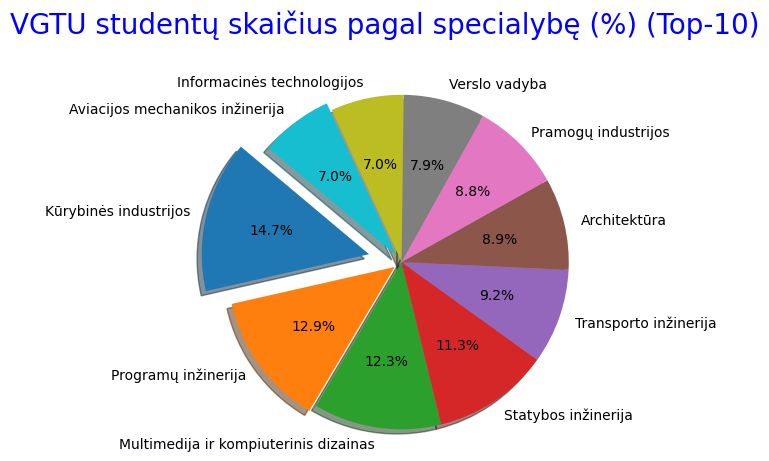

In [30]:
# 5 Diagrama
labels = df2['prg_pavad_lt']
sizes = df2['n_all']

explode = (0.2, 0.05, 0, 0, 0, 0, 0, 0, 0, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)

ax1.axis('equal') 
plt.title("VGTU studentų skaičius pagal specialybę (%) (Top-10)", y=1.1, fontsize=20, color="blue")
plt.show()


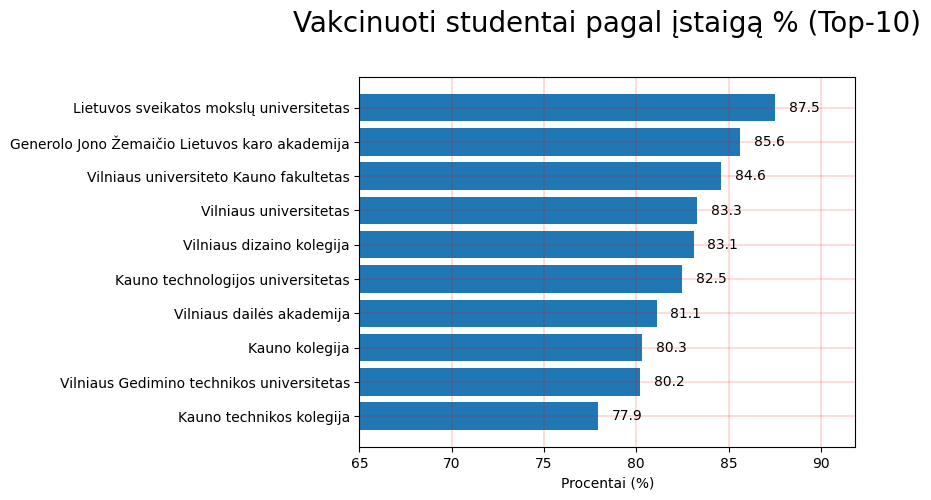

In [31]:
plt.rcdefaults()
fig, ax = plt.subplots()

avgAllVakSort = avgAllVak.sort(desc("avg(p_vac)")).limit(10)

# avgAllVakSort.show()
# SUAPVALINAME
df3 = avgAllVakSort.withColumn("avg(p_vac)", func.round(avgAllVakSort["avg(p_vac)"],1))

#Creating Table
df3.limit(10).registerTempTable('avgAllVak')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from avgAllVak").toPandas()
df2 = sqlContext.sql("SELECT ins_pav,'avg(p_vac)' from avgAllVak").toPandas()

fakultetai = df1['ins_pav']
procentaiAll = df1['avg(p_vac)']

# 6 DIAGRAMA
hbars3 = ax.barh(fakultetai, procentaiAll, align='center')
ax.set_yticks(fakultetai)
ax.set_yticklabels(fakultetai)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Procentai (%)')
ax.set_title('Vakcinuoti studentai pagal įstaigą % (Top-10)', fontsize=20, y=1.1)

ax.grid(color='r', linestyle='-', linewidth=0.2)

# Label with specially formatted floats
ax.bar_label(hbars3, fmt='%g', padding=10)
ax.set_xlim(left=65)

plt.show()



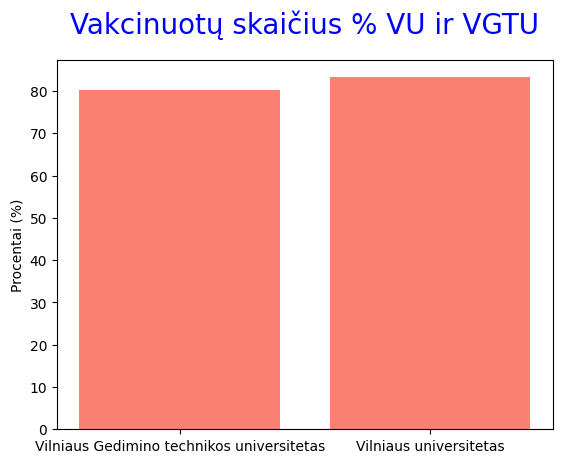

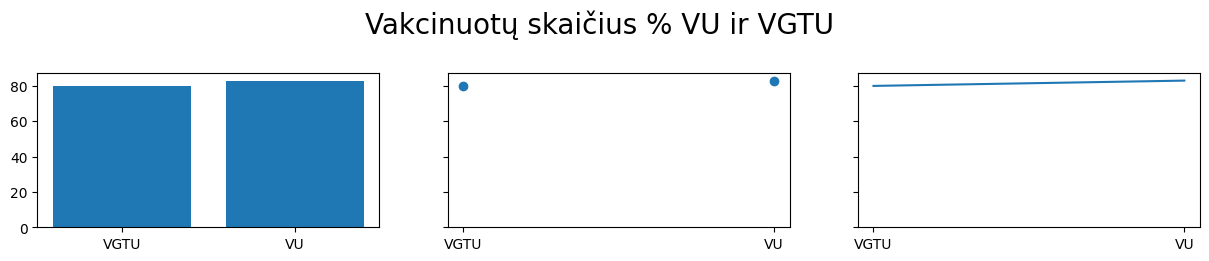

In [32]:
vuVgtu = need_new2.filter((need_new2["ins_pav"] == 'Vilniaus universitetas') | \
                 (need_new2["ins_pav"] == 'Vilniaus Gedimino technikos universitetas'))

avgVuVgtu = vuVgtu.groupBy("ins_pav").avg()

# 7 Diagrama
#Creating Table
avgVuVgtu.limit(10).registerTempTable('avgVuVgtu')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from avgVuVgtu").toPandas()

bars = plt.bar(df1['ins_pav'],df1['avg(p_vac)'], color="salmon", data=df1['avg(p_vac)'])
plt.title('Vakcinuotų skaičius % VU ir VGTU', color="blue",fontsize=20, y=1.05 )
plt.xticks(rotation=0)
plt.ylabel("Procentai (%)")
# plt.grid()

# Label with specially formatted floats
ax.bar_label(bars, fmt='%g', padding=2)
ax.set_xlim(left=65)

plt.show()

data = {'VGTU': 80, 'VU': 83}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Vakcinuotų skaičius % VU ir VGTU', fontsize=20, y=1.2)

plt.show()


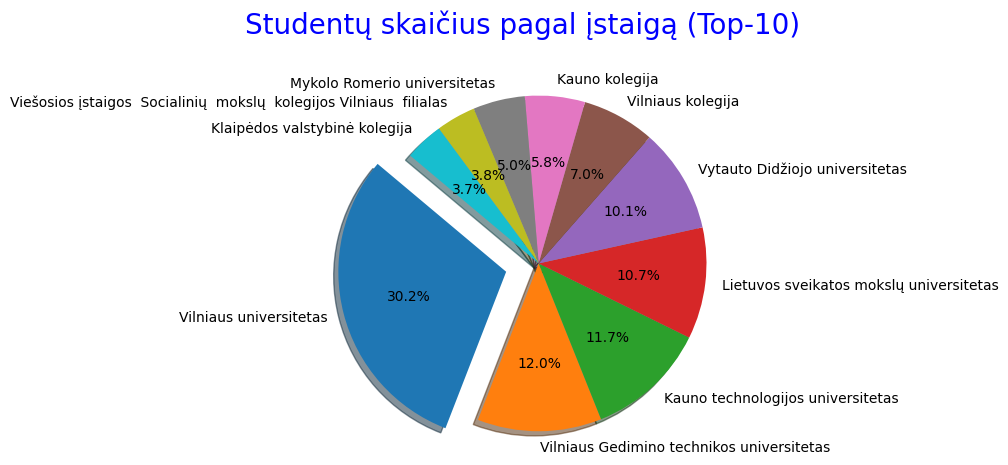

In [33]:
sumAllStudSort = sumaAlStud.sort(desc("sum(n_all)")).limit(10)

# 8 Diagrama
#Creating Table
sumAllStudSort.limit(10).registerTempTable('sumAllStudSort')
sqlContext = SQLContext(spark2)
#Running Query
df1 = sqlContext.sql("SELECT * from sumAllStudSort").toPandas()

labels = df1['ins_pav']
sizes = df1['sum(n_all)']

explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=140)

ax1.axis('equal') 
plt.title("Studentų skaičius pagal įstaigą (Top-10)", y=1.1, fontsize=20, color="blue")
plt.show()


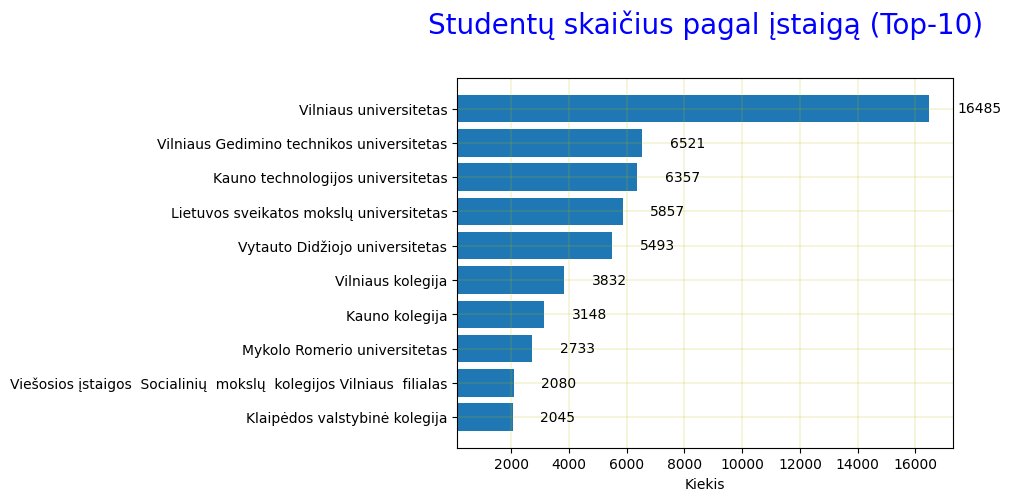

In [34]:
plt.rcdefaults()
fig, ax = plt.subplots()

hbars = ax.barh(df1['ins_pav'], df1['sum(n_all)'], align='center')
ax.set_yticks(df1['ins_pav'])
ax.set_yticklabels(df1['ins_pav'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Kiekis')
ax.set_title('Studentų skaičius pagal įstaigą (Top-10)', fontsize=20, y=1.1,  color="blue")

ax.grid(color='y', linestyle='-', linewidth=0.2)

# Label with specially formatted floats
ax.bar_label(hbars, fmt='%g', padding=20)
ax.set_xlim(left=120)

plt.show()